In [1]:
# From Phasukijwattana et al.  (2010), Leber Hereditary Optic
# Neuropathy (LHON) disease and genotypes for marker rs6767450
# Exercise 1: Read in the data
LHON=read.table("/home/ucsd-train26/code/biom262-2016/weeks/week09/LHON.txt",header=TRUE)

In [2]:
### View the first few lines of the LHON data
head(LHON)

,IID,GENO,PHENO
1,ID1,TT,CONTROL
2,ID2,CT,CONTROL
3,ID3,TT,CASE
4,ID4,CT,CONTROL
5,ID5,TT,CONTROL
6,ID6,TT,CONTROL


In [3]:
### Could also use the View command
View(LHON)

Warning message:
In View(LHON): unable to open display

ERROR: Error in .External2(C_dataviewer, x, title): unable to start data viewer


In [4]:
### Take a closer look at the types of variables in the LHON data frame
str(LHON)


'data.frame':	328 obs. of  3 variables:
 $ IID  : Factor w/ 328 levels "ID1","ID10","ID100",..: 1 112 223 263 274 285 296 307 318 2 ...
 $ GENO : Factor w/ 3 levels "CC","CT","TT": 3 2 3 2 3 3 1 3 3 3 ...
 $ PHENO: Factor w/ 2 levels "CASE","CONTROL": 2 2 1 2 2 2 2 2 2 2 ...


In [6]:
# Exercise 2: Perform logistic regression.  Obtain odds ratios and confidence intervals

# Create a 0 and 1 phenotype variable indicating Case/Control Status to perform a logistic regression analysis
LHON$newpheno=with(LHON,ifelse(PHENO=="CASE",1,0))
head(LHON)


,IID,GENO,PHENO,newpheno
1,ID1,TT,CONTROL,0
2,ID2,CT,CONTROL,0
3,ID3,TT,CASE,1
4,ID4,CT,CONTROL,0
5,ID5,TT,CONTROL,0
6,ID6,TT,CONTROL,0


In [7]:
## What would be the reference genotype for a logistic regression analysis?  
## The first factor will be the reference genotype.
levels(LHON$GENO)


[1] "CC" "CT" "TT"

In [9]:
# Perform a logistic regression analysis
model1=glm(newpheno~GENO,family=binomial(link="logit"),data=LHON)


In [10]:
# View the summary results of the logistic regression model, including parameter estimates and standard errors
summary(model1)

# Note:
# AIC: Aikake Information Criterion: 
# A relative estimate of the information lost when a given model is used to represent the process that generates 
# the data. It deals with the trade-off between the goodness of fit of the model and the complexity of the model.
# Does not give an absolute goodness of fit of the model. Generally the model with the smallest
# AIC is preferred.


Call:
glm(formula = newpheno ~ GENO, family = binomial(link = "logit"), 
    data = LHON)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9695  -0.8701  -0.8701   1.5197   2.1093  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)  -0.5108     0.5164  -0.989   0.3226  
GENOCT       -1.5994     0.6378  -2.508   0.0122 *
GENOTT       -0.2654     0.5349  -0.496   0.6197  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 383.49  on 327  degrees of freedom
Residual deviance: 368.48  on 325  degrees of freedom
AIC: 374.48

Number of Fisher Scoring iterations: 4


In [17]:
## What is the odds ratio for the CT genotype?
exp(-1.5994)

# Obtain a confidence interval for the odds ratio parameter for the CT genotype
myse=1.96*(.6378)
CI=c(-1.5994-myse,-1.5994+myse)
exp(CI)

[1] 0.2020177

[1] 0.05787394 0.70517308

In [18]:
# Similarly can obtain a confidence interval for the odds ratio for the TT genotype
exp(-.2654)
myse=1.96*(.5349)
CI=c(-.2654-myse,-.2654+myse)
exp(CI)

[1] 0.7668991

[1] 0.2687956 2.1880353

In [19]:
# Exercise 3: What happens if we change the reference genotype to be TT instead of CC?
LHON$NEWGENO=with(LHON,relevel(GENO, ref = "TT"))
levels(LHON$NEWGENO)

[1] "TT" "CC" "CT"

In [20]:
### Perform logistic regression
model2=glm(newpheno~NEWGENO,family=binomial(link="logit"),data=LHON)
summary(model2)


Call:
glm(formula = newpheno ~ NEWGENO, family = binomial(link = "logit"), 
    data = LHON)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9695  -0.8701  -0.8701   1.5197   2.1093  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -0.7763     0.1395  -5.563 2.64e-08 ***
NEWGENOCC     0.2654     0.5349   0.496 0.619739    
NEWGENOCT    -1.3340     0.3995  -3.339 0.000841 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 383.49  on 327  degrees of freedom
Residual deviance: 368.48  on 325  degrees of freedom
AIC: 374.48

Number of Fisher Scoring iterations: 4


In [15]:
# Get the odds ratio and confidence interval
exp(-1.3340 )
myse=1.96*(.3995)
CI=c(-1.3340-myse,-1.3340+myse)
exp(CI)

[1] 0.2634215

[1] 0.1203899 0.5763847

In [21]:
# Could also do the following to get 95% confidence interval of parameters from your model
MYCI=confint.default(model2)
exp(MYCI)

,2.5 %,97.5 %
(Intercept),0.3500310,0.6048404
NEWGENOCC,0.4570423,3.7204782
NEWGENOCT,0.1203945,0.5764187


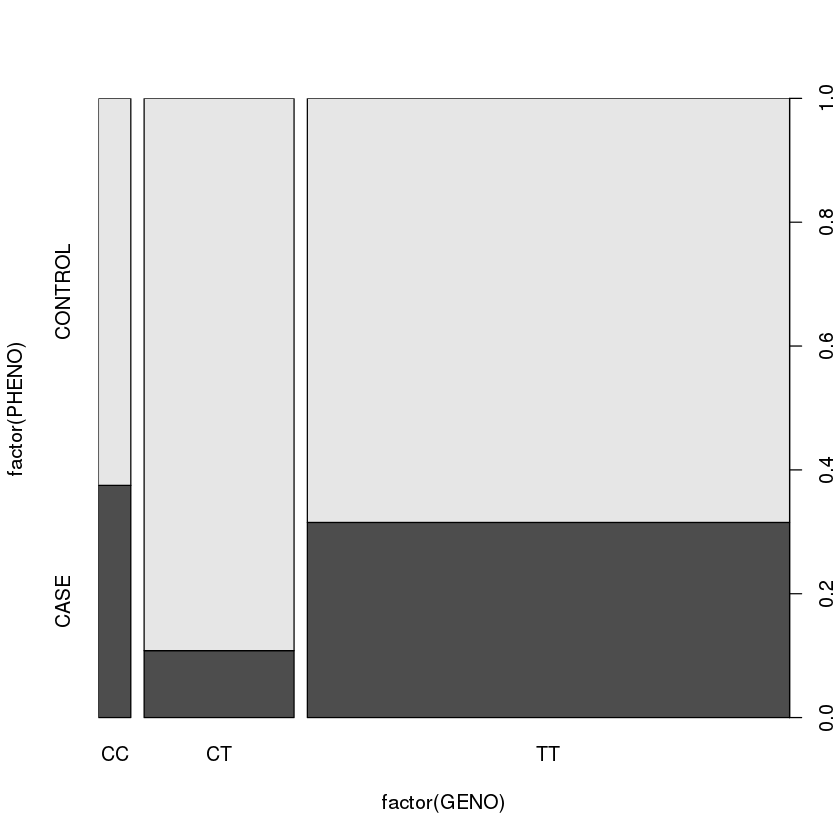

In [22]:
### Plot the data for a better understanding
plot(factor(PHENO)~factor(GENO), data=LHON)

In [24]:
# Excercise 4: Additive logistic regression model
LHON$genoadd <- with(LHON, 0 + 1*(GENO=="CT") + 2*(GENO=="TT"))
summary(LHON)
model3 <- glm(newpheno~genoadd,family=binomial(link="logit"),data=LHON)
summary(model3)

      IID      GENO         PHENO        newpheno      NEWGENO     genoadd     
 ID1    :  1   CC: 16   CASE   : 89   Min.   :0.0000   TT:238   Min.   :0.000  
 ID10   :  1   CT: 74   CONTROL:239   1st Qu.:0.0000   CC: 16   1st Qu.:1.000  
 ID100  :  1   TT:238                 Median :0.0000   CT: 74   Median :2.000  
 ID101  :  1                          Mean   :0.2713            Mean   :1.677  
 ID102  :  1                          3rd Qu.:1.0000            3rd Qu.:2.000  
 ID103  :  1                          Max.   :1.0000            Max.   :2.000  
 (Other):322                                                                   


Call:
glm(formula = newpheno ~ genoadd, family = binomial(link = "logit"), 
    data = LHON)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.8436  -0.8436  -0.6854   1.5531   1.9797  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -1.8077     0.4554  -3.970  7.2e-05 ***
genoadd       0.4787     0.2505   1.911   0.0559 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 383.49  on 327  degrees of freedom
Residual deviance: 379.47  on 326  degrees of freedom
AIC: 383.47

Number of Fisher Scoring iterations: 4


In [19]:
exp(0.4787)
MYCI2=confint.default(model3)
exp(MYCI2)

[1] 1.613975

,2.5 %,97.5 %
(Intercept),0.06718883,0.40046163
genoadd,0.9879249,2.6369796
